## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

  - Which variables are significant in predicting the demand for shared bikes.
  - How well those variables describe the bike demands
  
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Step 1: Importing Libraries

Let us first import libraries required for all the operations in the notebook

In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Step 2: Reading and Understanding the Data

Reading the  dataset

In [3]:
bike0 = pd.read_csv("day.csv")

In [4]:
bike0.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike0.shape

(730, 16)

In [6]:
bike0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike0.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 3: Data Preparation

#### Removing redundant & unwanted columns

 - Instant : it is a index , so not required.
 - dteday : We have day , year as seperate columns so this is not required.
 - registered & casual : our problem statement wants us to predict the variables causing total count, so these are not required. 

In [8]:
bike0.drop(columns= ['instant','dteday','casual','registered'],inplace=True)

#### Checking for null values

In [9]:
bike0.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

  - There are no null values.

 
  - We can notice that the temparature given have different precission, so rounding the temparature to 1 digits after decimal point, as we humans cannot percieve those minor temp changes

  - Same with the humidity and wind speed

In [10]:
bike0['temp']=bike0['temp'].round(1)
bike0['atemp'] = bike0['atemp'].round(1)

bike0['hum']=bike0['hum'].round(1)
bike0['windspeed'] = bike0['windspeed'].round(1)


#### To Map the data with user readable text

In [11]:
# to map the seasons , months and weather columns so the variables can easily be read
bike0['season'] = bike0['season'].map({1:"1_spring", 2:"2_summer", 3:"3_fall", 4:"4_winter"})
bike0['mnth'] = bike0['mnth'].map({ 1: "01_jan" , 2:"02_feb" , 3: "03_mar" , 4:"04_apr", 5:"05_may" , 6:"06_jun", 7:"07_jul", 8:"08_aug",9:"09_sep",10:"10_oct", 11:"11_nov" ,12:"12_dec"})
bike0['weekday'] = bike0['weekday'].map({ 0:"0_sunday" , 1: "1_monday" , 2:"2_tuesday" , 3: "3_wednesday" , 4:"4_thursday", 5:"5_friday" , 6:"6_saturday"})
bike0['weathersit'] = bike0['weathersit'].map({ 1: "1_clear" , 2: "2_mist" , 3: "3_light_snow_or_rain" , 4:"4_heavy_rain_snow"})

## Step 4 : Data visualisation

In [12]:
categorical_variables= ['season','mnth','weathersit','holiday','weekday','workingday']
for var in categorical_variables:
    print(bike0[var].value_counts() , "\n")

3_fall      188
2_summer    184
1_spring    180
4_winter    178
Name: season, dtype: int64 

01_jan    62
08_aug    62
12_dec    62
07_jul    62
03_mar    62
05_may    62
10_oct    62
06_jun    60
11_nov    60
04_apr    60
09_sep    60
02_feb    56
Name: mnth, dtype: int64 

1_clear                 463
2_mist                  246
3_light_snow_or_rain     21
Name: weathersit, dtype: int64 

0    709
1     21
Name: holiday, dtype: int64 

1_monday       105
2_tuesday      105
6_saturday     104
5_friday       104
4_thursday     104
0_sunday       104
3_wednesday    104
Name: weekday, dtype: int64 

1    504
0    226
Name: workingday, dtype: int64 



Observations:
  - There is no data for demand on days with heavy rains and tunder stroms

### Uni variant analysis

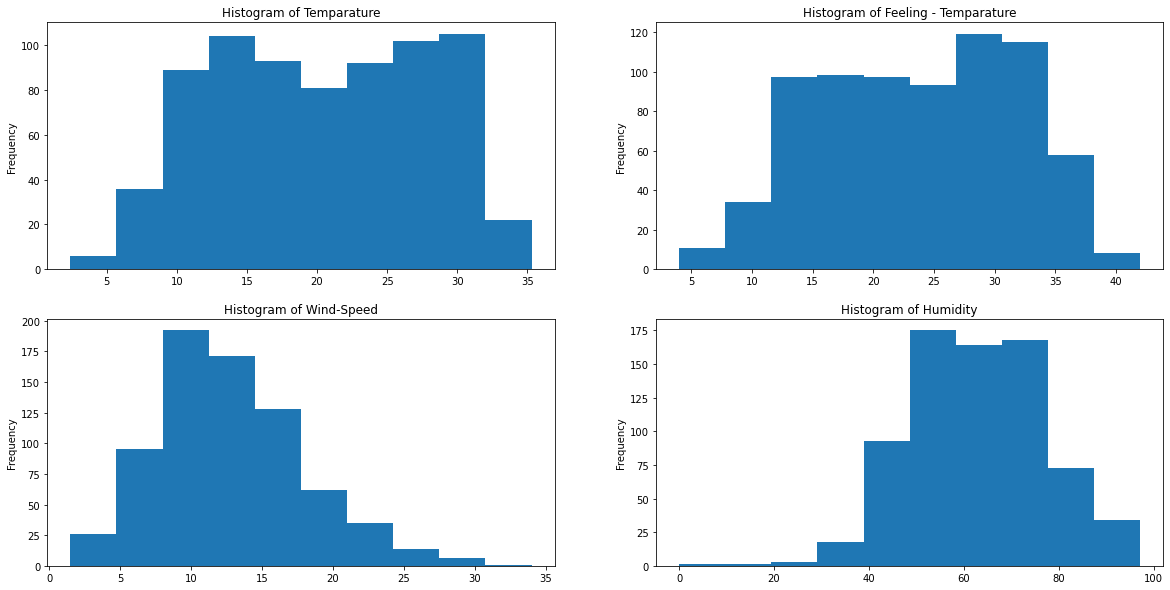

In [13]:
# Univarient analysis of numerical variable to find range and spread
plt.figure(figsize=[20,10])
plt.subplot(2, 2, 1)
plt.title('Histogram of Temparature')
bike0['temp'].plot.hist()

plt.subplot(2, 2, 2)
plt.title('Histogram of Feeling - Temparature')
bike0['atemp'].plot.hist()

plt.subplot(2, 2, 3)
plt.title('Histogram of Wind-Speed')
bike0['windspeed'].plot.hist()

plt.subplot(2, 2, 4)
plt.title('Histogram of Humidity')
bike0['hum'].plot.hist()

plt.show()

### Bi variant analysis

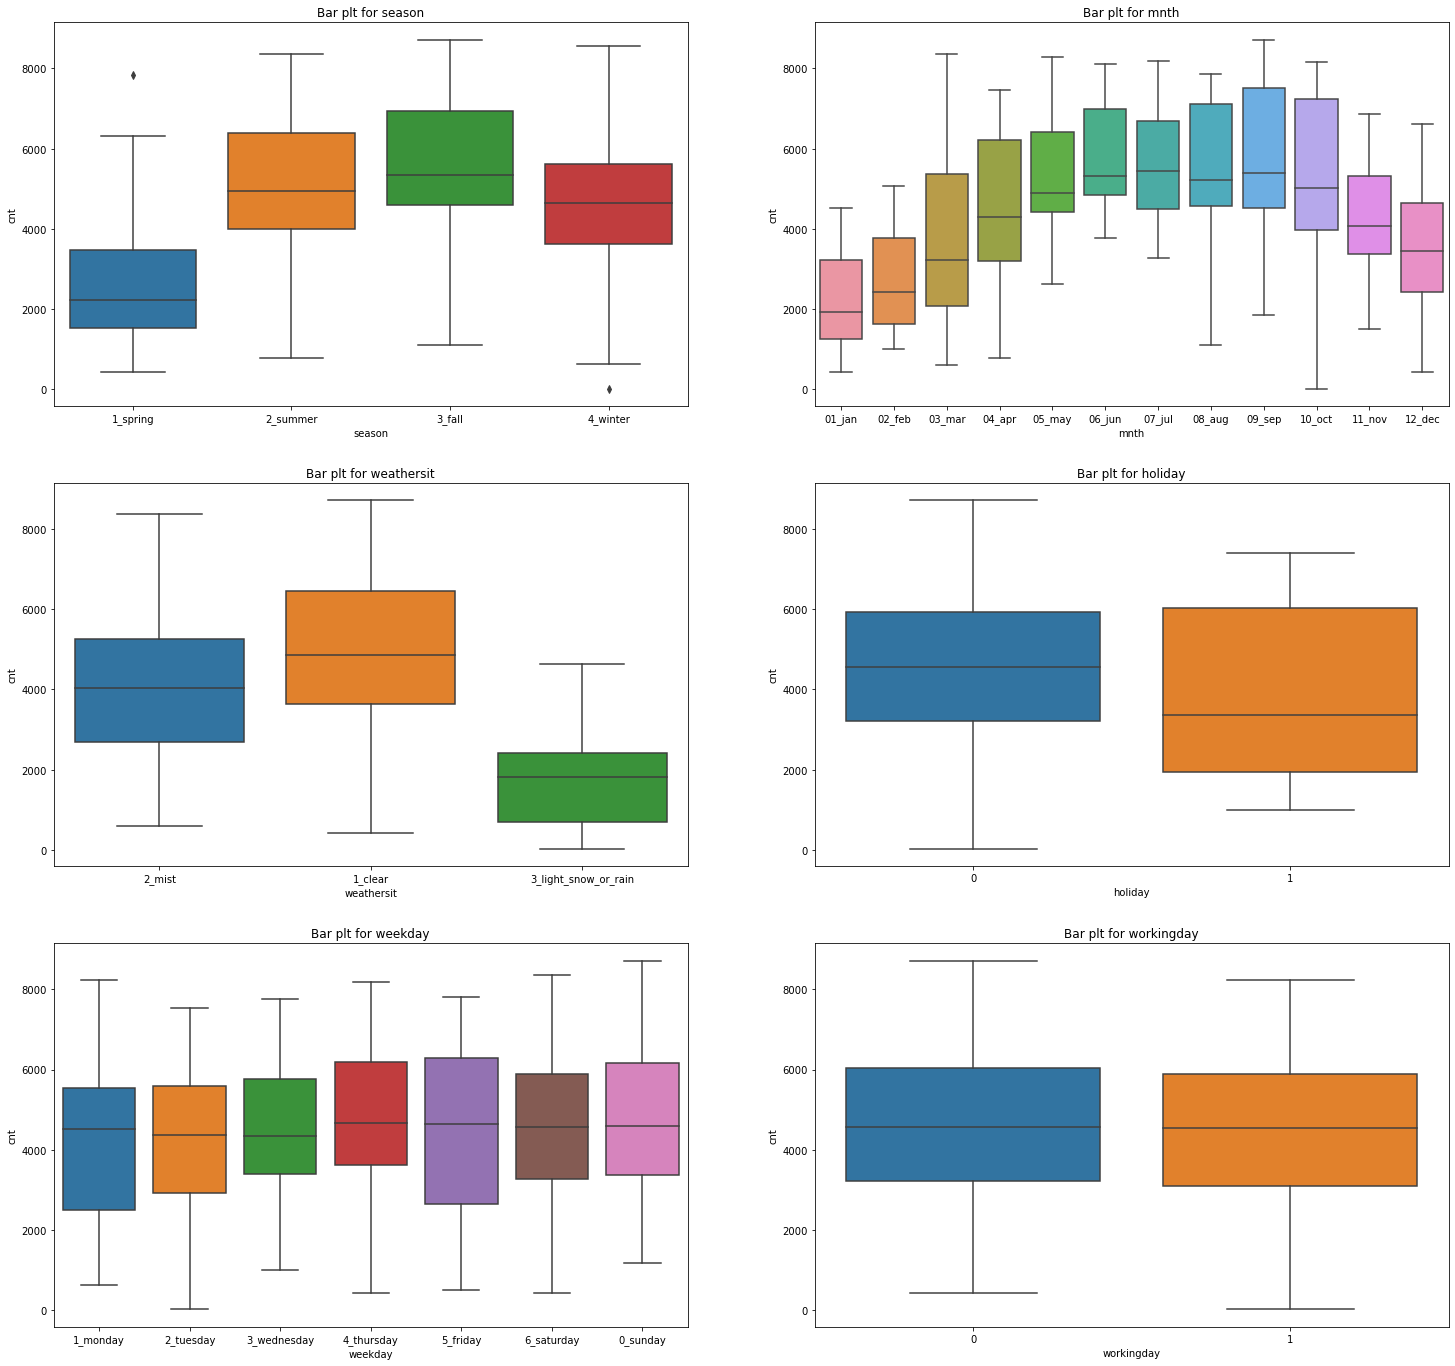

In [14]:
number_of_variables = len(categorical_variables)
plt.figure(figsize=(25, math.ceil(number_of_variables/2)*8))

for i,var in enumerate(categorical_variables,start = 1):
    plt.subplot(math.ceil(number_of_variables/2),2,i)
    plt.title('Bar plt for {}'.format(var))
    sns.boxplot(x = var, y = 'cnt', data = bike0)

Observations:
   - in terms of months the avarage demand is in high in july , folowed by september , june and august
   - in terms of seasons avarage demand is high in fall
   - The avarage demand is almost similar on both working day and holiday 
   - There are less bookings when it is lightly snowing or lightly raining

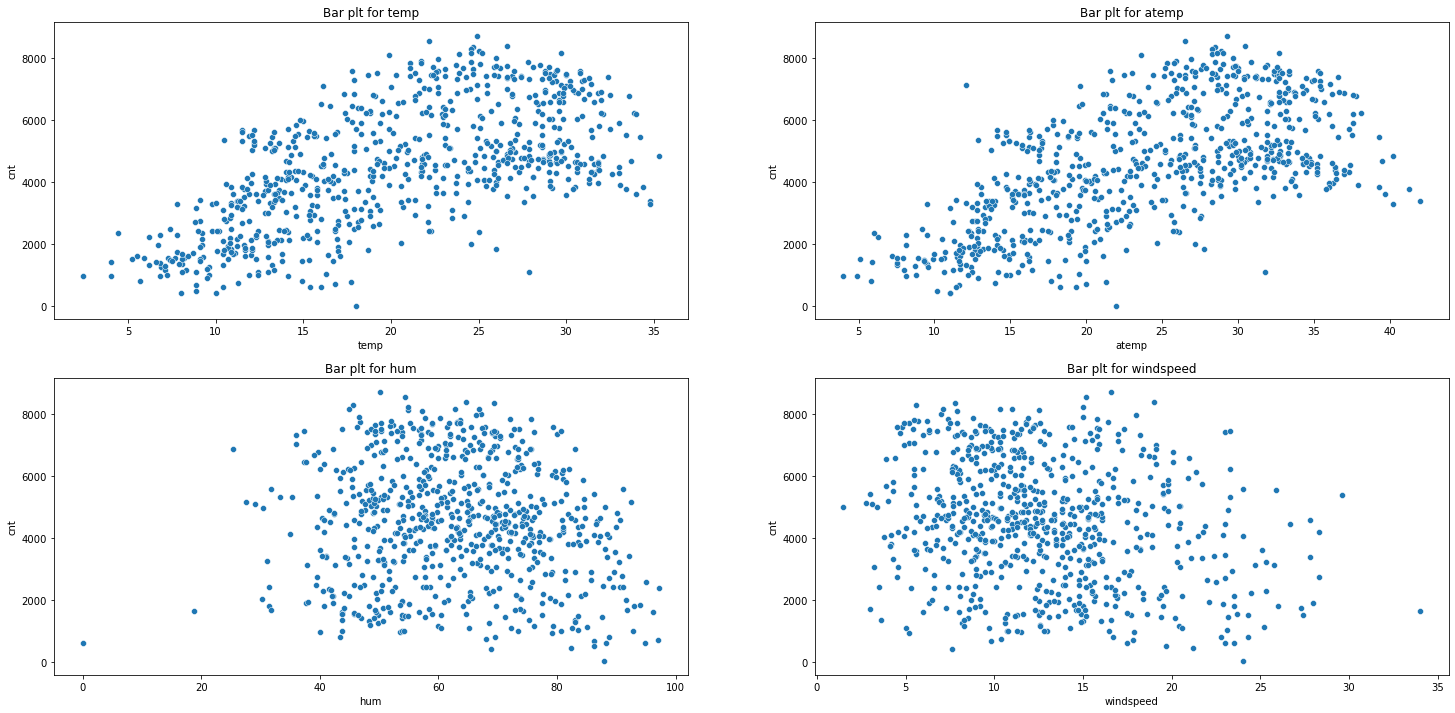

In [15]:
numerical_variables = ['temp','atemp','hum','windspeed']
number_of_variables = len(numerical_variables)
plt.figure(figsize=(25, math.ceil(number_of_variables/2)*6))

for i,var in enumerate(numerical_variables,start = 1):
    plt.subplot(math.ceil(number_of_variables/2),2,i)
    plt.title('Bar plt for {}'.format(var))
    sns.scatterplot(x = var, y = 'cnt', data = bike0)

Observations:-
  - A visibile pattern is seen in temparature and the demand
  - no visible patterns for wind speed and humidity

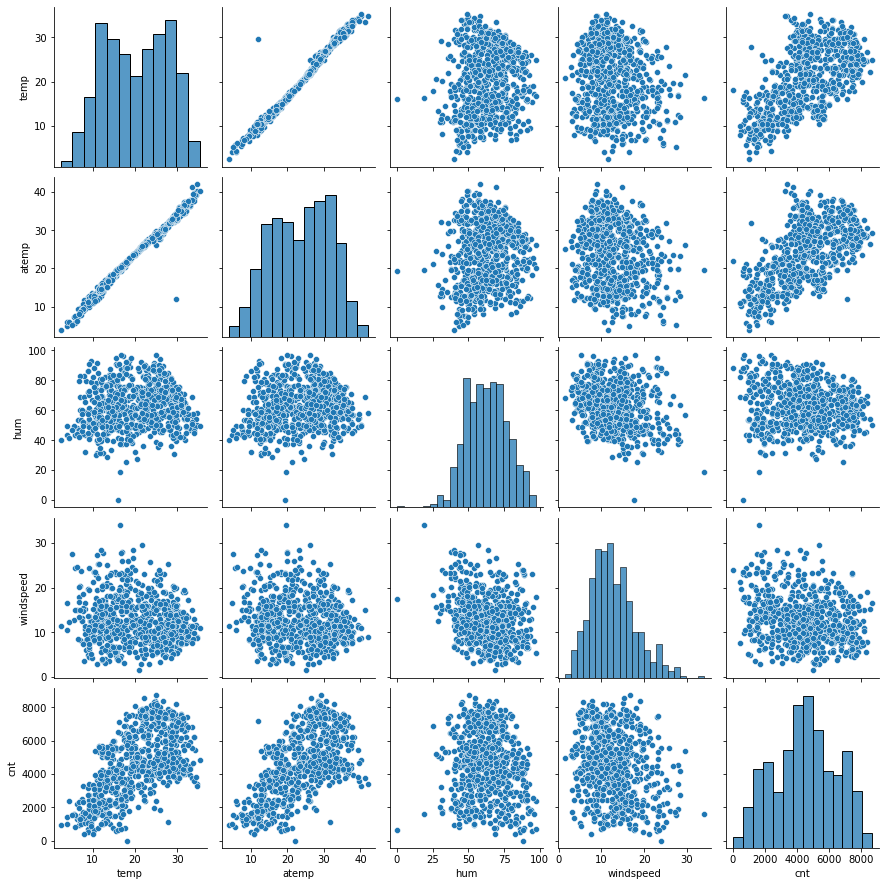

In [16]:
sns.pairplot(bike0[['temp','atemp','hum','windspeed','cnt']])
plt.show()

Observations :
   - temparature and feeting-temparature have a visible high positive correlation 

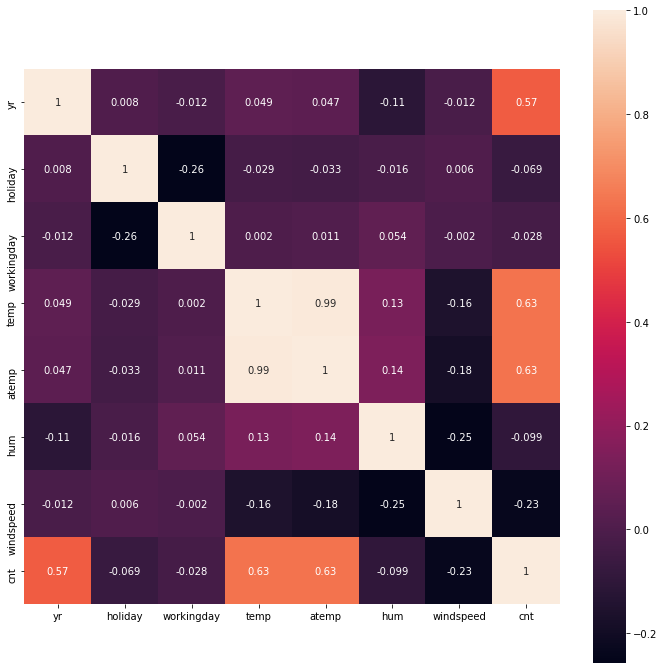

atemp       temp          0.991623
temp        atemp         0.991623
cnt         atemp         0.630695
atemp       cnt           0.630695
temp        cnt           0.627003
cnt         temp          0.627003
yr          cnt           0.569728
cnt         yr            0.569728
workingday  holiday       0.257009
holiday     workingday    0.257009
windspeed   hum           0.248486
hum         windspeed     0.248486
windspeed   cnt           0.235240
cnt         windspeed     0.235240
windspeed   atemp         0.183809
atemp       windspeed     0.183809
temp        windspeed     0.158294
windspeed   temp          0.158294
hum         atemp         0.141567
atemp       hum           0.141567
temp        hum           0.128716
hum         temp          0.128716
yr          hum           0.112501
hum         yr            0.112501
            cnt           0.098502
cnt         hum           0.098502
            holiday       0.068764
holiday     cnt           0.068764
hum         workingd

In [17]:
corr_mat = bike0.corr().round(3)
plt.figure(figsize=[12,12])
sns.heatmap(data=corr_mat,square=True,annot=True,cbar=True)
plt.show()
correlation_data = bike0.corr().abs().unstack().sort_values(ascending=False).dropna()
correlation_data = correlation_data[correlation_data != 1.0]

correlation_data[0:30]

 Observations :-

     - Apart from predictor variable variable pairs 
     - (temp,atemp) has  high correlation 
     - (temp,windspeed) , (temp,hum) , (atemp,windspeed) , (atemp, hum) have some correlation

## Step 5 : Adding Dummy variables

Let's replace the Categorical nominal data with few dummy variables

##### note :- there is no data for for weather situation value '4' which is heavy rain so we consider k instead of k-1 variables

In [18]:
bike1 = pd.get_dummies(bike0,columns=['season','mnth','weekday'],drop_first=True)

In [19]:
bike1 = pd.get_dummies(bike1,columns=['weathersit'])

## Step 6: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [20]:
np.random.seed(0)
df_train, df_test = train_test_split(bike1, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [21]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2_summer,season_3_fall,...,mnth_12_dec,weekday_1_monday,weekday_2_tuesday,weekday_3_wednesday,weekday_4_thursday,weekday_5_friday,weekday_6_saturday,weathersit_1_clear,weathersit_2_mist,weathersit_3_light_snow_or_rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.102745,23.494706,63.112353,12.832549,4486.382353,0.245098,0.262745,...,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.627451,0.343137,0.029412
std,0.500429,0.157763,0.453386,7.430685,8.087974,14.157132,5.291996,1952.158739,0.430568,0.440557,...,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.483958,0.475223,0.169124
min,0.000000,0.000000,0.000000,2.400000,4.000000,0.000000,2.800000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.625000,16.625000,52.225000,9.000000,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.250000,24.000000,63.450000,12.050000,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.600000,30.200000,73.250000,15.800000,5973.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.300000,42.000000,97.000000,34.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
scaler = MinMaxScaler()

In [23]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [24]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2_summer,season_3_fall,...,mnth_12_dec,weekday_1_monday,weekday_2_tuesday,weekday_3_wednesday,weekday_4_thursday,weekday_5_friday,weekday_6_saturday,weathersit_1_clear,weathersit_2_mist,weathersit_3_light_snow_or_rain
653,1,0,1,0.510638,0.500000,0.575258,0.301282,0.864243,0,0,...,0,0,0,1,0,0,0,1,0,0
576,1,0,1,0.814590,0.765789,0.725773,0.266026,0.827658,0,1,...,0,0,0,1,0,0,0,1,0,0
426,1,0,0,0.443769,0.439474,0.640206,0.256410,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.246201,0.200000,0.497938,0.663462,0.204096,0,0,...,1,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395137,0.392105,0.505155,0.189103,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0


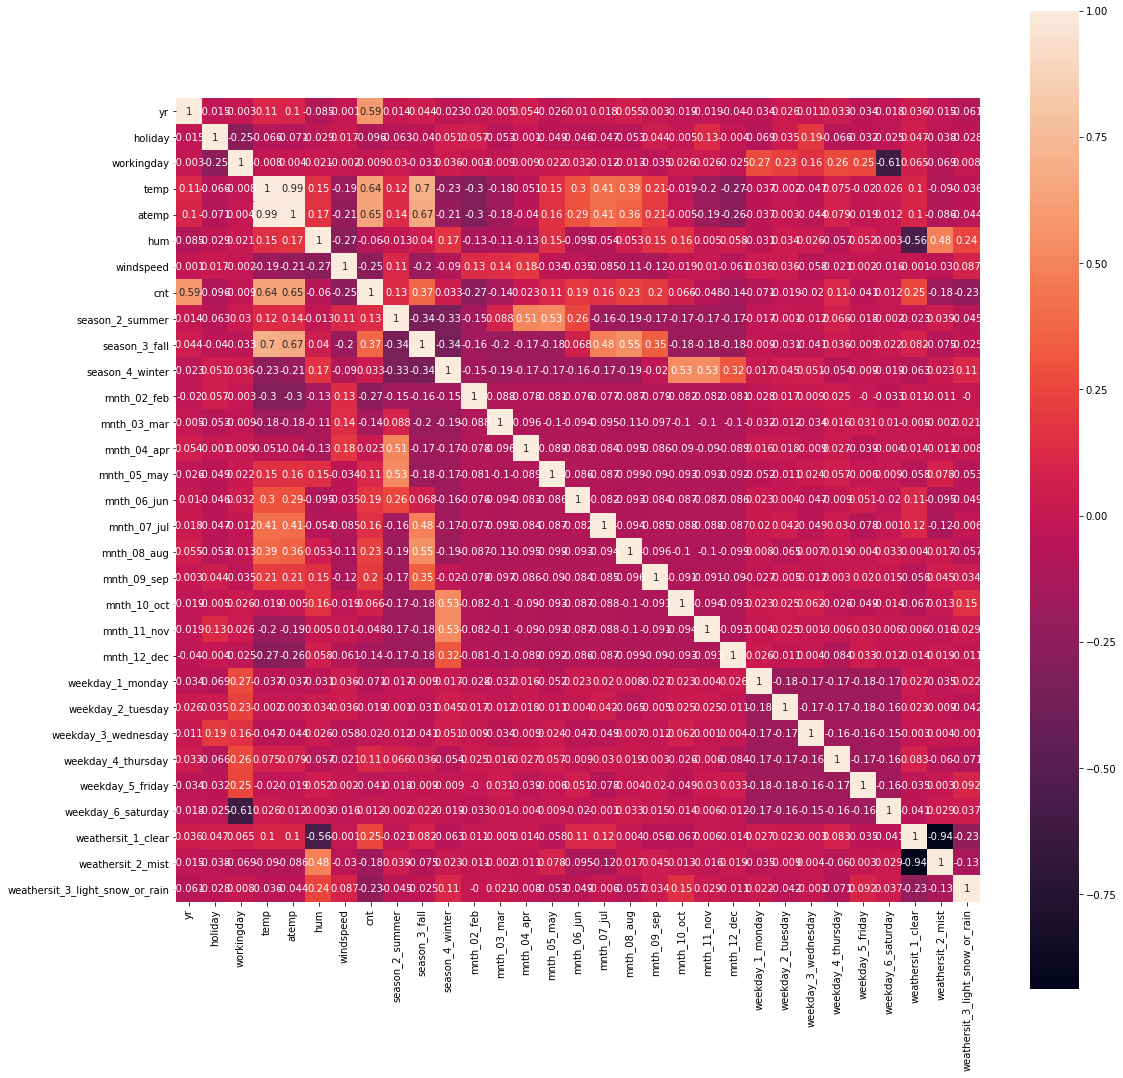

temp                atemp                 0.989449
atemp               temp                  0.989449
weathersit_2_mist   weathersit_1_clear    0.937983
weathersit_1_clear  weathersit_2_mist     0.937983
temp                season_3_fall         0.697800
season_3_fall       temp                  0.697800
atemp               season_3_fall         0.670025
season_3_fall       atemp                 0.670025
cnt                 atemp                 0.646428
atemp               cnt                   0.646428
temp                cnt                   0.643488
cnt                 temp                  0.643488
weekday_6_saturday  workingday            0.605864
workingday          weekday_6_saturday    0.605864
cnt                 yr                    0.591508
yr                  cnt                   0.591508
weathersit_1_clear  hum                   0.558025
hum                 weathersit_1_clear    0.558025
mnth_08_aug         season_3_fall         0.546121
season_3_fall       mnth_08_aug

In [25]:
corr_mat = df_train.corr().round(3)
plt.figure(figsize=[18,18])
sns.heatmap(data=corr_mat,square=True,annot=True,cbar=True)
plt.show()
correlation_data = df_train.corr().abs().unstack().sort_values(ascending=False).dropna()
correlation_data = correlation_data[correlation_data != 1.0]

correlation_data[0:30]

Observations :
  - There exists multi variable collinearity , and will reflect in VIF in future , will eliminate those in later steps  

#### Dividing into X and Y sets for the model building

In [26]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 7: Building a linear model

In [27]:
# making functions to remove redundency in code

def linearmodel_stats_and_vif(X_train,y_train):
    X_train_lm = sm.add_constant(X_train)
    lr = sm.OLS(y_train, X_train_lm).fit()
    print(lr.summary())
    return lr.params

def checking_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)


### Model 1 : with all variables

In [28]:
linearmodel_stats_and_vif(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.59
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          3.24e-178
Time:                        21:18:45   Log-Likelihood:                 524.12
No. Observations:                 510   AIC:                            -988.2
Df Residuals:                     480   BIC:                            -861.2
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

const                              0.100076
yr                                 0.230889
holiday                           -0.135328
workingday                        -0.060768
temp                               0.411908
atemp                              0.035515
hum                               -0.157749
windspeed                         -0.181908
season_2_summer                    0.085866
season_3_fall                      0.043751
season_4_winter                    0.154613
mnth_02_feb                        0.026252
mnth_03_mar                        0.064004
mnth_04_apr                        0.063291
mnth_05_may                        0.087740
mnth_06_jun                        0.064847
mnth_07_jul                        0.028946
mnth_08_aug                        0.085739
mnth_09_sep                        0.149651
mnth_10_oct                        0.069138
mnth_11_nov                        0.021810
mnth_12_dec                        0.017667
weekday_1_monday                

In [29]:
checking_vif(X_train)

                           Features    VIF
3                              temp  66.39
2                        workingday  66.33
4                             atemp  55.44
21                 weekday_1_monday  42.92
22                weekday_2_tuesday  42.04
25                 weekday_5_friday  41.09
24               weekday_4_thursday  40.36
23              weekday_3_wednesday  37.42
27               weathersit_1_clear  36.66
28                weathersit_2_mist  25.99
8                     season_3_fall  11.38
16                      mnth_08_aug  10.01
15                      mnth_07_jul   8.96
9                   season_4_winter   8.24
14                      mnth_06_jun   6.89
1                           holiday   6.80
17                      mnth_09_sep   6.78
7                   season_2_summer   6.73
13                      mnth_05_may   6.58
18                      mnth_10_oct   6.10
19                      mnth_11_nov   5.57
12                      mnth_04_apr   5.30
29  weather

### To minimise the variables using RFE

In [30]:
lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(lm, 15) 
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2_summer', True, 1),
 ('season_3_fall', True, 1),
 ('season_4_winter', True, 1),
 ('mnth_02_feb', False, 12),
 ('mnth_03_mar', True, 1),
 ('mnth_04_apr', False, 3),
 ('mnth_05_may', False, 2),
 ('mnth_06_jun', False, 4),
 ('mnth_07_jul', False, 13),
 ('mnth_08_aug', True, 1),
 ('mnth_09_sep', True, 1),
 ('mnth_10_oct', True, 1),
 ('mnth_11_nov', False, 14),
 ('mnth_12_dec', False, 15),
 ('weekday_1_monday', False, 10),
 ('weekday_2_tuesday', False, 11),
 ('weekday_3_wednesday', False, 9),
 ('weekday_4_thursday', False, 7),
 ('weekday_5_friday', False, 8),
 ('weekday_6_saturday', False, 16),
 ('weathersit_1_clear', True, 1),
 ('weathersit_2_mist', True, 1),
 ('weathersit_3_light_snow_or_rain', True, 1)]

In [32]:
print('columns to remove :', list(X_train.columns[~rfe.support_]))

columns to remove : ['workingday', 'atemp', 'mnth_02_feb', 'mnth_04_apr', 'mnth_05_may', 'mnth_06_jun', 'mnth_07_jul', 'mnth_11_nov', 'mnth_12_dec', 'weekday_1_monday', 'weekday_2_tuesday', 'weekday_3_wednesday', 'weekday_4_thursday', 'weekday_5_friday', 'weekday_6_saturday']


### Model 2 

Choosing top 15 variables by RFE 

In [33]:
X_train_new = X_train[X_train.columns[rfe.support_]]

In [34]:
linearmodel_stats_and_vif(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.5
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          7.09e-190
Time:                        21:18:45   Log-Likelihood:                 513.58
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     495   BIC:                            -933.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

const                              0.098156
yr                                 0.229700
holiday                           -0.090288
temp                               0.495717
hum                               -0.170150
windspeed                         -0.186036
season_2_summer                    0.121634
season_3_fall                      0.036332
season_4_winter                    0.150362
mnth_03_mar                        0.028455
mnth_08_aug                        0.050610
mnth_09_sep                        0.120282
mnth_10_oct                        0.042092
weathersit_1_clear                 0.133610
weathersit_2_mist                  0.077653
weathersit_3_light_snow_or_rain   -0.113107
dtype: float64

In [35]:
checking_vif(X_train_new)

                           Features    VIF
12               weathersit_1_clear  29.45
13                weathersit_2_mist  22.38
6                     season_3_fall   6.29
2                              temp   3.71
14  weathersit_3_light_snow_or_rain   3.44
5                   season_2_summer   2.65
7                   season_4_winter   2.34
3                               hum   1.91
9                       mnth_08_aug   1.68
11                      mnth_10_oct   1.52
10                      mnth_09_sep   1.40
4                         windspeed   1.20
8                       mnth_03_mar   1.17
0                                yr   1.03
1                           holiday   1.02


### Model 3 

Removing season_3_fall as it has High p-value followed by high vif

In [36]:
X_train_new.drop(columns = ["season_3_fall"], inplace=True)

In [37]:
linearmodel_stats_and_vif(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.4
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.74e-190
Time:                        21:18:46   Log-Likelihood:                 512.26
No. Observations:                 510   AIC:                            -996.5
Df Residuals:                     496   BIC:                            -937.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

const                              0.099925
yr                                 0.228619
holiday                           -0.091960
temp                               0.536577
hum                               -0.178889
windspeed                         -0.189616
season_2_summer                    0.104934
season_4_winter                    0.139427
mnth_03_mar                        0.023778
mnth_08_aug                        0.060699
mnth_09_sep                        0.129390
mnth_10_oct                        0.038310
weathersit_1_clear                 0.132185
weathersit_2_mist                  0.077398
weathersit_3_light_snow_or_rain   -0.109659
dtype: float64

In [38]:
checking_vif(X_train_new)

                           Features    VIF
11               weathersit_1_clear  29.44
12                weathersit_2_mist  22.36
13  weathersit_3_light_snow_or_rain   3.42
3                               hum   1.87
6                   season_4_winter   1.79
2                              temp   1.62
10                      mnth_10_oct   1.49
8                       mnth_08_aug   1.46
5                   season_2_summer   1.38
9                       mnth_09_sep   1.25
4                         windspeed   1.19
7                       mnth_03_mar   1.12
0                                yr   1.03
1                           holiday   1.02


### Model 4

Dropping weathersit_1_clear as it i having high VIF

In [39]:
X_train_new.drop(columns = ["weathersit_1_clear"], inplace=True)

In [40]:
linearmodel_stats_and_vif(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.4
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.74e-190
Time:                        21:18:46   Log-Likelihood:                 512.26
No. Observations:                 510   AIC:                            -996.5
Df Residuals:                     496   BIC:                            -937.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

const                              0.232110
yr                                 0.228619
holiday                           -0.091960
temp                               0.536577
hum                               -0.178889
windspeed                         -0.189616
season_2_summer                    0.104934
season_4_winter                    0.139427
mnth_03_mar                        0.023778
mnth_08_aug                        0.060699
mnth_09_sep                        0.129390
mnth_10_oct                        0.038310
weathersit_2_mist                 -0.054787
weathersit_3_light_snow_or_rain   -0.241844
dtype: float64

In [41]:
checking_vif(X_train_new)

                           Features    VIF
3                               hum  14.77
2                              temp  10.03
4                         windspeed   3.71
6                   season_4_winter   2.34
11                weathersit_2_mist   2.14
0                                yr   2.02
5                   season_2_summer   1.83
8                       mnth_08_aug   1.61
10                      mnth_10_oct   1.61
9                       mnth_09_sep   1.34
7                       mnth_03_mar   1.22
12  weathersit_3_light_snow_or_rain   1.18
1                           holiday   1.04


### Model 5

Dropping hum as it has high VIF

In [42]:
X_train_new.drop(columns = ["hum"], inplace=True)

In [43]:
linearmodel_stats_and_vif(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          8.56e-187
Time:                        21:18:46   Log-Likelihood:                 500.69
No. Observations:                 510   AIC:                            -975.4
Df Residuals:                     497   BIC:                            -920.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

const                              0.128993
yr                                 0.232559
holiday                           -0.093274
temp                               0.515494
windspeed                         -0.155134
season_2_summer                    0.101688
season_4_winter                    0.131105
mnth_03_mar                        0.025249
mnth_08_aug                        0.059226
mnth_09_sep                        0.122710
mnth_10_oct                        0.033894
weathersit_2_mist                 -0.083334
weathersit_3_light_snow_or_rain   -0.289721
dtype: float64

In [44]:
checking_vif(X_train_new)

                           Features   VIF
2                              temp  5.12
3                         windspeed  3.31
0                                yr  2.01
5                   season_4_winter  1.98
4                   season_2_summer  1.82
7                       mnth_08_aug  1.61
9                       mnth_10_oct  1.60
10                weathersit_2_mist  1.49
8                       mnth_09_sep  1.34
6                       mnth_03_mar  1.19
11  weathersit_3_light_snow_or_rain  1.10
1                           holiday  1.04


### Model 6

dropping mnth_3_mar due to high P-value

In [45]:
X_train_new.drop(columns = ["mnth_03_mar"], inplace=True)

In [46]:
linearmodel_stats_and_vif(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          2.49e-187
Time:                        21:18:47   Log-Likelihood:                 499.13
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

const                              0.135190
yr                                 0.232784
holiday                           -0.095892
temp                               0.509356
windspeed                         -0.152193
season_2_summer                    0.101602
season_4_winter                    0.126732
mnth_08_aug                        0.057096
mnth_09_sep                        0.120983
mnth_10_oct                        0.034194
weathersit_2_mist                 -0.083408
weathersit_3_light_snow_or_rain   -0.288331
dtype: float64

In [47]:
checking_vif(X_train_new)

                           Features   VIF
2                              temp  5.12
3                         windspeed  3.12
0                                yr  2.00
5                   season_4_winter  1.95
4                   season_2_summer  1.82
8                       mnth_10_oct  1.60
6                       mnth_08_aug  1.59
9                 weathersit_2_mist  1.49
7                       mnth_09_sep  1.34
10  weathersit_3_light_snow_or_rain  1.09
1                           holiday  1.04


### Model 7

dropping mnth_10_oct due to high p-value

In [48]:
X_train_new.drop(columns = ["mnth_10_oct"], inplace=True)

In [49]:
linearmodel_stats_and_vif(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.6
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          9.78e-188
Time:                        21:18:47   Log-Likelihood:                 497.23
No. Observations:                 510   AIC:                            -972.5
Df Residuals:                     499   BIC:                            -925.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

const                              0.130883
yr                                 0.232499
holiday                           -0.097054
temp                               0.517600
windspeed                         -0.149999
season_2_summer                    0.100042
season_4_winter                    0.138446
mnth_08_aug                        0.054038
mnth_09_sep                        0.116012
weathersit_2_mist                 -0.082570
weathersit_3_light_snow_or_rain   -0.282848
dtype: float64

In [50]:
checking_vif(X_train_new)

                          Features   VIF
2                             temp  5.02
3                        windspeed  3.11
0                               yr  2.00
4                  season_2_summer  1.81
6                      mnth_08_aug  1.58
5                  season_4_winter  1.49
8                weathersit_2_mist  1.49
7                      mnth_09_sep  1.31
9  weathersit_3_light_snow_or_rain  1.08
1                          holiday  1.04


In [51]:
linearmodel_stats_and_vif(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.6
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          9.78e-188
Time:                        21:18:47   Log-Likelihood:                 497.23
No. Observations:                 510   AIC:                            -972.5
Df Residuals:                     499   BIC:                            -925.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

const                              0.130883
yr                                 0.232499
holiday                           -0.097054
temp                               0.517600
windspeed                         -0.149999
season_2_summer                    0.100042
season_4_winter                    0.138446
mnth_08_aug                        0.054038
mnth_09_sep                        0.116012
weathersit_2_mist                 -0.082570
weathersit_3_light_snow_or_rain   -0.282848
dtype: float64

###### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

Note: -  The temp variable has VIF above 5... but going throug the data the temp has a visible relation with the passengers riding bike, hence high VIF is being ignored.

#### to build the (final) linear regression model

In [52]:
X_train_lm = sm.add_constant(X_train_new)
lr_final = sm.OLS(y_train, X_train_lm).fit()
lr_final.params

const                              0.130883
yr                                 0.232499
holiday                           -0.097054
temp                               0.517600
windspeed                         -0.149999
season_2_summer                    0.100042
season_4_winter                    0.138446
mnth_08_aug                        0.054038
mnth_09_sep                        0.116012
weathersit_2_mist                 -0.082570
weathersit_3_light_snow_or_rain   -0.282848
dtype: float64

## Step 7: Residual Analysis of the train data

We check if the error terms are also normally distributed or not to satisfy the assumptions of linear regressions

In [53]:
y_train_predicted = lr_final.predict(X_train_lm)

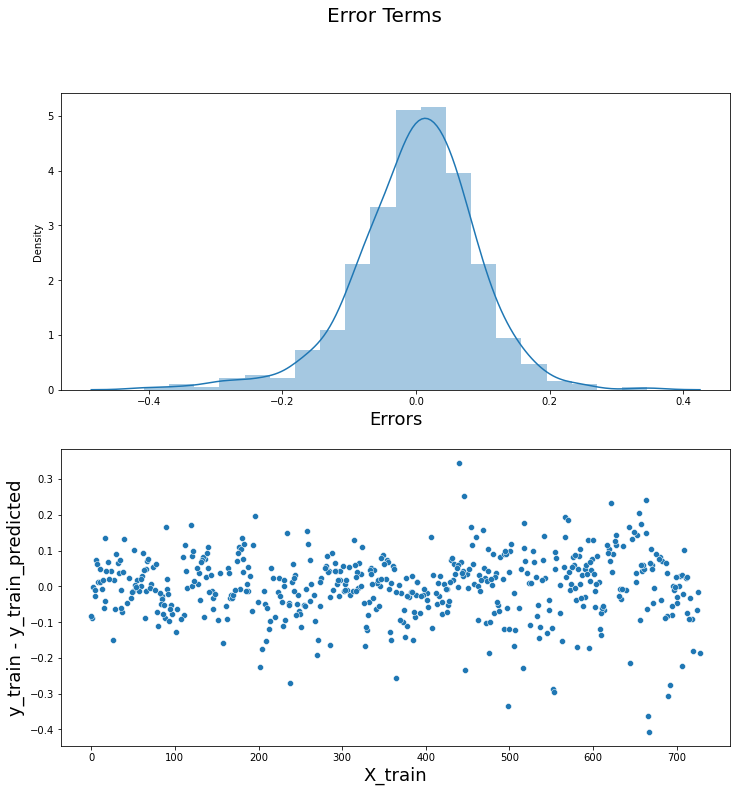

In [54]:
# Plot the histogram of the error terms
fig = plt.figure(figsize = [12,12])

plt.subplot(2,1,1)
sns.distplot((y_train - y_train_predicted), bins = 20)
fig.suptitle('Distibution of Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)
fig.suptitle('Error Terms', fontsize = 20)

plt.subplot(2,1,2)
sns.scatterplot(data = y_train - y_train_predicted)
plt.xlabel('X_train', fontsize = 18)
plt.ylabel('y_train - y_train_predicted',fontsize = 18)


plt.show()

Observation:- 

  - As it follows normal distribution with it's mean at zero the assumption holds
  - no visible pattern in errors. Error terms are independent of each other .

### R2 for Train data

In [55]:
r2_train = r2_score(y_train, y_train_predicted)
r2_train 

0.8345187910882458

### Adjusted R^2 Value for Train data

In [56]:
# n is number of rows in X

n = X_train_lm.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_train_lm.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.8308635836624841

## Step 8: Making Predictions Using the Final Model
#### Applying the scaling on the test sets

In [57]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

# Apply the same scaling to test data
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [58]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2_summer,season_3_fall,...,mnth_12_dec,weekday_1_monday,weekday_2_tuesday,weekday_3_wednesday,weekday_4_thursday,weekday_5_friday,weekday_6_saturday,weathersit_1_clear,weathersit_2_mist,weathersit_3_light_snow_or_rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.545944,0.531713,0.509196,0.418920,0.516216,0.264840,0.246575,...,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.652968,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.249696,0.228031,0.201344,0.188090,0.238702,0.442259,0.432005,...,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.477117,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.326299,0.335165,0.358635,0.283019,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545455,0.549451,0.494429,0.403774,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759740,0.721154,0.651811,0.524528,0.682487,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [59]:
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_test.columns[rfe.support_]]
X_test_new = X_test_new.drop(["season_3_fall","weathersit_1_clear","hum","mnth_03_mar","mnth_10_oct"], axis = 1)

In [61]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test_new)

In [62]:
# Making predictions using fourth model

y_test_predicted = lr_final.predict(X_test_lm)

### R2 for test data

In [63]:
r2_test = r2_score(y_test, y_test_predicted)
r2_test

0.7839095350697434

### Adjusted R^2 Value for TEST

In [64]:
# n is number of rows in X

n = X_test_lm.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_lm.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.7724264668850438

#### Comparing the R2 values of test and train data

In [65]:
100*(adjusted_r2_train - adjusted_r2_test)/adjusted_r2_train

7.033298597568435

Observation:
   - The model has good prediction on unforseen data

## Step 9: Model Evaluation (on test data)

to plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

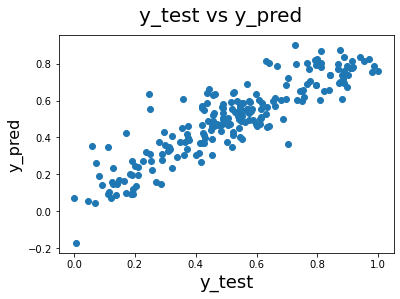

In [66]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_predicted)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)      

Observation : -
- there is a linear relation ship without any increase in variance , hence we can say the model has done well with homoscadacicity

## Report

We can see that the equation of our best fitted line is:

     DEMAND  = 0.131 × CONST + 0.2325 × YEAR_FACTOR - 0.097 × HOLIDAY + 0.5176 ×  TEMPARATURE - 0.150 ×  WINDSPEED 
        
        + 0.100 × SUMMER_SEASON + 0.1385 × WINTER_SEASON + 0.054 × AUGUST + 0.116 × SEPTEMBER  
        
        - 0.083 × MISTY - 0.283 × SNOWING_OR_RAINIG_LIGHTLY


As per our model the TOP predictor variables are

   - **Temparature** : The temparautre plays a role , as it decreases our demand goes down by a factor of 0.5176, could be because the rider is not comfortable driving in cold
   -  **Year** : With every year the demand seems to increase by 0.2325
   - **Weather** : mist and light snow or rain seems to have negative effect
   - **Wind Speed** : wind speed has an negative effect. With increase in wind speed demand decreases by 0.15
   - **Season** : Summer and winter season seems to have positive effect

The Atmost variables the company should concentrate on are **Temparature**, **Weather** and **Year**, followed by others